In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split, KFold
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
import random
import copy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# %cd /content/drive/MyDrive/Colab Notebooks/BigData_proj/model

df_old =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa/fifa_dataset_with_latest_ranking.csv')

In [ ]:
df_old

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_total_points,away_team_total_points,home_B1_point,home_B2_point,...,away_B2_point,away_B3_point,away_B4_point,away_M1_point,away_M2_point,away_M3_point,away_M4_point,away_T1_point,away_T2_point,away_K1_point
0,Mali,Nigeria,2,1,African Nations Championship,True,664.00,710.00,73,72,...,72,71,69,78,77,75,75,80,78,80
1,Ghana,Congo,1,0,African Nations Championship,True,849.00,421.00,73,72,...,59,59,57,72,69,67,63,73,72,66
2,South Africa,Mali,1,1,African Nations Championship,False,554.00,664.00,72,72,...,72,70,70,77,76,72,71,76,74,70
3,Norway,Poland,0,3,Friendly,True,558.00,461.00,74,74,...,75,74,73,79,78,76,75,87,82,80
4,South Africa,Nigeria,1,3,African Nations Championship,False,576.00,701.00,72,72,...,72,71,69,78,77,75,75,80,78,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,Luxembourg,Bulgaria,0,0,Friendly,False,1243.80,1335.36,67,66,...,68,67,66,70,69,69,67,72,67,66
2541,Moldova,Romania,0,5,Friendly,False,961.23,1434.68,61,58,...,73,72,71,76,76,75,75,78,75,76
2542,Norway,Finland,1,1,Friendly,False,1473.04,1405.60,77,77,...,71,71,69,78,74,72,72,75,73,83
2543,Slovakia,Chile,0,0,Friendly,False,1425.59,1509.61,77,75,...,75,74,74,80,77,76,76,79,77,78


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fifa/fifa_dataset_with_latest_ranking.csv')

In [ ]:
df

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_total_points,away_team_total_points,home_B1_point,home_B2_point,...,away_B2_point,away_B3_point,away_B4_point,away_M1_point,away_M2_point,away_M3_point,away_M4_point,away_T1_point,away_T2_point,away_K1_point
0,Mali,Nigeria,2,1,African Nations Championship,True,664.00,710.00,73,72,...,72,71,69,78,77,75,75,80,78,80
1,Ghana,Congo,1,0,African Nations Championship,True,849.00,421.00,73,72,...,59,59,57,72,69,67,63,73,72,66
2,South Africa,Mali,1,1,African Nations Championship,False,554.00,664.00,72,72,...,72,70,70,77,76,72,71,76,74,70
3,Norway,Poland,0,3,Friendly,True,558.00,461.00,74,74,...,75,74,73,79,78,76,75,87,82,80
4,South Africa,Nigeria,1,3,African Nations Championship,False,576.00,701.00,72,72,...,72,71,69,78,77,75,75,80,78,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,Luxembourg,Bulgaria,0,0,Friendly,False,1243.80,1335.36,67,66,...,68,67,66,70,69,69,67,72,67,66
2541,Moldova,Romania,0,5,Friendly,False,961.23,1434.68,61,58,...,73,72,71,76,76,75,75,78,75,76
2542,Norway,Finland,1,1,Friendly,False,1473.04,1405.60,77,77,...,71,71,69,78,74,72,72,75,73,83
2543,Slovakia,Chile,0,0,Friendly,False,1425.59,1509.61,77,75,...,75,74,74,80,77,76,76,79,77,78


In [ ]:

#date 형식 변환
#df['date'] = [i.replace('-','') for i in df['date']]
#all_list : tournament,home_team, away_team
all_list = ((df['tournament'].unique()).tolist() + (df['home_team'].unique()).tolist() + (df['away_team'].unique()).tolist())

uni_len = '***'.join(all_list)
nat_enc = tf.keras.preprocessing.text.Tokenizer(num_words=len(all_list),
    filters='',
    lower=False,
    split = '***')
nat_enc.fit_on_texts([uni_len])
nat_dic = nat_enc.word_index

In [ ]:
#값을 enumerate로 변환
for step, val in enumerate(df['tournament']):
    df['tournament'].iloc[step] = (nat_dic.get(val))
for step, val in enumerate(df['home_team']):
    df['home_team'].iloc[step] = (nat_dic.get(val))
for step, val in enumerate(df['away_team']):
    df['away_team'].iloc[step] = (nat_dic.get(val))
for step, val in enumerate(df['neutral']):
    if df['neutral'].iloc[step] == False:
        df['neutral'].iloc[step] = 0
    if df['neutral'].iloc[step] == True:
        df['neutral'].iloc[step] = 1
# for step, val in enumerate(df['preferred_foot']):
#     if df['preferred_foot'].iloc[step] == False:
#       df['preferred_foot'].iloc[step] = 0 
#     if df['preferred_foot'].iloc[step] == True:
#       df['preferred_foot'].iloc[step] = 1

In [ ]:
df.head()

,home_team,away_team,home_score,away_score,tournament,neutral,home_team_total_points,away_team_total_points,home_B1_point,home_B2_point,...,away_B2_point,away_B3_point,away_B4_point,away_M1_point,away_M2_point,away_M3_point,away_M4_point,away_T1_point,away_T2_point,away_K1_point
0,1,10,2,1,91,1,664.0,710.0,73,72,...,72,71,69,78,77,75,75,80,78,80
1,2,58,1,0,91,1,849.0,421.0,73,72,...,59,59,57,72,69,67,63,73,72,66
2,3,1,1,1,91,0,554.0,664.0,72,72,...,72,70,70,77,76,72,71,76,74,70
3,4,25,0,3,92,1,558.0,461.0,74,74,...,75,74,73,79,78,76,75,87,82,80
4,3,10,1,3,91,0,576.0,701.0,72,72,...,72,71,69,78,77,75,75,80,78,80


In [ ]:
#df_new
df_new = df
#len
temp_tor = []
for i in df_old['tournament']:
    temp_tor.append(len(i))
temp_away = []
for i in df_old['away_team']:
    temp_away.append(len(i))
temp_home = []
for i in df_old['home_team']:
    temp_home.append(len(i))
df_new['tor_len'] = temp_tor
df_new['home_len'] = temp_home
df_new['away_len'] = temp_away

# 결측값 있는 행 제거
df_new = df_new.dropna()

df_label1 = df_new['home_score']
df_label2 = df_new['away_score']

In [ ]:
#df_new, df_label 분리 : 모델의 인풋(df_new)과 아웃풋(df_label, home_score 과 away score)
df_new = df_new.drop(['home_score', 'away_score'], axis = 1)
#df_label
df_label = pd.concat([df_label1, df_label2],axis = 1)
df_label.columns = ['home_score', 'away_score']

**df_label** : 왜 인덱스가 7948까지 있을까? 표시는 6547 rows라고 되긴 함

In [ ]:
df_label

,home_score,away_score
0,2,1
1,1,0
2,1,1
3,0,3
4,1,3
...,...,...
2540,0,0
2541,0,5
2542,1,1
2543,0,0


In [ ]:
x_train = df_new.to_numpy()
df_train = pd.DataFrame(data=x_train, columns=df_new.columns)

**df_train**

In [ ]:
df_train

,home_team,away_team,tournament,neutral,home_team_total_points,away_team_total_points,home_B1_point,home_B2_point,home_B3_point,home_B4_point,...,away_M1_point,away_M2_point,away_M3_point,away_M4_point,away_T1_point,away_T2_point,away_K1_point,tor_len,home_len,away_len
0,1,10,91,1,664.0,710.0,73,72,70,70,...,78,77,75,75,80,78,80,28,4,7
1,2,58,91,1,849.0,421.0,73,72,71,71,...,72,69,67,63,73,72,66,28,5,5
2,3,1,91,0,554.0,664.0,72,72,72,70,...,77,76,72,71,76,74,70,28,12,4
3,4,25,92,1,558.0,461.0,74,74,73,72,...,79,78,76,75,87,82,80,8,6,6
4,3,10,91,0,576.0,701.0,72,72,72,70,...,78,77,75,75,80,78,80,28,12,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,85,16,92,0,1243.8,1335.36,67,66,61,58,...,70,69,69,67,72,67,66,8,10,8
2541,82,27,92,0,961.23,1434.68,61,58,57,47,...,76,76,75,75,78,75,76,8,7,7
2542,4,34,92,0,1473.04,1405.6,77,77,75,75,...,78,74,72,72,75,73,83,8,6,7
2543,55,6,92,0,1425.59,1509.61,77,75,74,73,...,80,77,76,76,79,77,78,8,8,5


In [ ]:
#x_train = df_new.to_numpy()
Norm = Normalizer() # 각 변수의 값을 원점으로부터 1만큼 떨어져 있는 값으로 변환 
x_temp = Norm.fit_transform(x_train) # dataset for training
df_temp = pd.DataFrame(data=x_temp, columns=df_new.columns)

**df_temp** : df_train은 x_train을 사용, df_temp는 x_train을 normalize한 값인 x_temp 사용

In [ ]:
df_temp

,home_team,away_team,tournament,neutral,home_team_total_points,away_team_total_points,home_B1_point,home_B2_point,home_B3_point,home_B4_point,...,away_M1_point,away_M2_point,away_M3_point,away_M4_point,away_T1_point,away_T2_point,away_K1_point,tor_len,home_len,away_len
0,0.000964,0.009644,0.087765,0.000964,0.640393,0.684758,0.070405,0.069440,0.067511,0.067511,...,0.075227,0.074262,0.072334,0.072334,0.077156,0.075227,0.077156,0.027005,0.003858,0.006751
1,0.001981,0.057437,0.090117,0.000990,0.840758,0.416913,0.072291,0.071301,0.070311,0.070311,...,0.071301,0.068330,0.066350,0.062388,0.072291,0.071301,0.065359,0.027728,0.004951,0.004951
2,0.003207,0.001069,0.097283,0.000000,0.592249,0.709844,0.076971,0.076971,0.076971,0.074833,...,0.082316,0.081247,0.076971,0.075902,0.081247,0.079109,0.074833,0.029933,0.012829,0.004276
3,0.004922,0.030765,0.113217,0.001231,0.686684,0.567314,0.091066,0.091066,0.089835,0.088604,...,0.097219,0.095988,0.093527,0.092296,0.107064,0.100911,0.098449,0.009845,0.007384,0.007384
4,0.003071,0.010235,0.093140,0.000000,0.589548,0.717488,0.073693,0.073693,0.073693,0.071646,...,0.079835,0.078811,0.076764,0.076764,0.081882,0.079835,0.081882,0.028659,0.012282,0.007165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540,0.045774,0.008616,0.049544,0.000000,0.669809,0.719116,0.036081,0.035542,0.032850,0.031234,...,0.037696,0.037158,0.037158,0.036081,0.038773,0.036081,0.035542,0.004308,0.005385,0.004308
2541,0.046552,0.015328,0.052229,0.000000,0.545700,0.814483,0.034630,0.032927,0.032359,0.026682,...,0.043146,0.043146,0.042578,0.042578,0.044281,0.042578,0.043146,0.004542,0.003974,0.003974
2542,0.001933,0.016431,0.044460,0.000000,0.711856,0.679265,0.037211,0.037211,0.036244,0.036244,...,0.037694,0.035761,0.034794,0.034794,0.036244,0.035278,0.040110,0.003866,0.002900,0.003383
2543,0.026065,0.002843,0.043599,0.000000,0.675589,0.715407,0.036490,0.035543,0.035069,0.034595,...,0.037912,0.036490,0.036017,0.036017,0.037438,0.036490,0.036964,0.003791,0.003791,0.002370


In [ ]:
df_corr = df_temp.corr() # 각 열간의 상관계수 반환 

df_label과 df_temp(normalize된 값)

In [ ]:
y_es = df_label.to_numpy() # home_team_score, away_team_score
x_es = df_temp.to_numpy() # dataset for training
X_train, X_test , y_train, y_test = train_test_split(x_es, y_es, random_state=28)

In [ ]:
rand_clf = RandomForestClassifier(criterion='entropy', bootstrap=True, random_state=42, max_depth=5)
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test) 

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

df_features = df_new.keys().to_list()

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(rand_clf.feature_importances_, 3)))

# feature별 importance 매핑 
for name, value in zip(df_features , rand_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))


Feature importances:
[0.023 0.032 0.013 0.014 0.101 0.107 0.024 0.031 0.031 0.031 0.022 0.028
 0.031 0.032 0.028 0.02  0.035 0.035 0.034 0.033 0.031 0.02  0.031 0.024
 0.032 0.026 0.028 0.036 0.019 0.022 0.026]
home_team : 0.023
away_team : 0.032
tournament : 0.013
neutral : 0.014
home_team_total_points : 0.101
away_team_total_points : 0.107
home_B1_point : 0.024
home_B2_point : 0.031
home_B3_point : 0.031
home_B4_point : 0.031
home_M1_point : 0.022
home_M2_point : 0.028
home_M3_point : 0.031
home_M4_point : 0.032
home_T1_point : 0.028
home_T2_point : 0.020
home_K1_point : 0.035
away_B1_point : 0.035
away_B2_point : 0.034
away_B3_point : 0.033
away_B4_point : 0.031
away_M1_point : 0.020
away_M2_point : 0.031
away_M3_point : 0.024
away_M4_point : 0.032
away_T1_point : 0.026
away_T2_point : 0.028
away_K1_point : 0.036
tor_len : 0.019
home_len : 0.022
away_len : 0.026


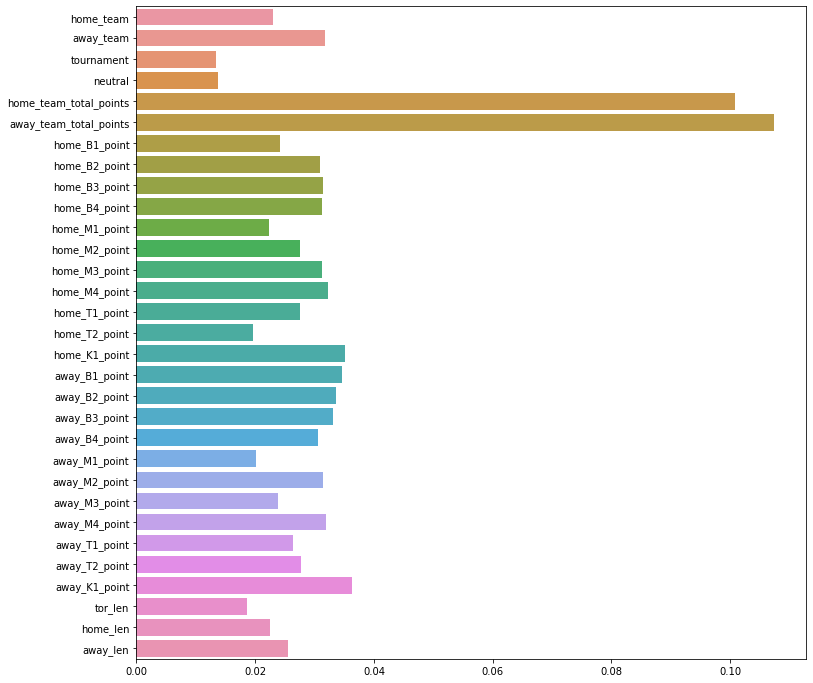

In [ ]:
plt.figure(figsize=(12,12))
sns.barplot(x=rand_clf.feature_importances_ ,y= df_features)

여기서부터 기존 xgb_regressor

In [ ]:
params = {
    "estimator__colsample_bylevel": uniform(0.7, 0.3),
    "estimator__gamma": uniform(0, 0.5),
    "estimator__learning_rate": uniform(0.003, 0.3),
    "estimator__max_depth": randint(2, 6),
    "estimator__n_estimators": randint(100, 500), 
    "estimator__subsample": uniform(0.6, 0.4)
}

In [ ]:
#Multioutput regression are regression problems that involve predicting two or more numerical values given an input example.
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', eval_metric=['mae'], random_state = 1, use_label_encoder=False))

In [ ]:
#search : 하이퍼 파라미터 튜닝
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state =1, n_iter=5, cv=3,
                            verbose=0, n_jobs=1, return_train_score=True) 
search.fit(x_t, y_t) 

best_param = search.best_params_
print('-')
print(search.best_score_)
print(best_param)
print('-')

-
0.07262575076506832
{'estimator__colsample_bylevel': 0.9147911547905092, 'estimator__gamma': 0.40137875196868245, 'estimator__learning_rate': 0.030840242592221373, 'estimator__max_depth': 3, 'estimator__n_estimators': 101, 'estimator__subsample': 0.9460081007915934}
-


In [ ]:
#RandomizedSearchCV로 찾은 best param을 모델에 적용
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',eval_metric=['mae'], random_state = 1, 
                              use_label_encoder=False, **best_param)).fit(x_t, y_t) 

In [ ]:
#MAE : MSE와 유사한 loss function
#이 코드에서 loss function이 적용되는 부분이 어디지? 못 찾았음
print('MAE: ',mean_absolute_error(y_val, xgb_model.predict(x_val)))

MAE:  0.8672534859676376


In [ ]:
#K-fold 교차 검증:
#전체 훈련 데이터를 K개의 그룹으로 묶고, 그중 한 그룹을 검증셋으로 사용합니다. 
#이때 각각의 모든 데이터 그룹이 적어도 한 번씩은 검증셋으로 사용되어야 합니다. 
#K-fold 교차 검증을 사용함으로써 검정 데이터에 모델이 과적합 되는 것을 막을 수 있습니다. 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(xgb_model, x_val, y_val, scoring='neg_mean_absolute_error', cv=folds, verbose=0)
print('KFold_Neg_MAE: ',np.mean(scores))

KFold_Neg_MAE:  -0.9150680176862405


In [ ]:
#inp_list: 사용자가 입력한 home_team, away team
def predict_score(inp_list, autofill, Norm, seed, model):
    ind_list = []
    for i in inp_list:
        ind_list.append(nat_dic.get(i))
    seed[:,1] = ind_list[0]
    seed[:,2] = ind_list[1]
    x_test = Norm.fit_transform(seed) # Norm.fit_transform() 의 역할은 ? 
    pred = model.predict(x_test)
    return np.ravel(pred).tolist()

In [ ]:
#inp = str(input("Enter Home & Away team (like Home Away): "))
autofill = True
#inp = inp.split(' ')
inp = ['Jordan', 'Morocco']

# **mixed** : seed = np.delete를 주석처리하면 해결됨. 기존 코드 체크하기

In [ ]:
x_train.shape[0]

2548

In [ ]:
def create_params():
  seed = x_train[random.randint(0,x_train.shape[0])].reshape(1,-1)
  # random.randin() 함수에서는 0부터 len(x_train) 까지해서 하나를 뽑고 있음 
  # 
  #seed = np.delete(seed, 4, axis=1) -> 기존 배열에서 5번째 열 제거 ? Delete 함수 자체는 flatten 한다 -> 우리는 이미 1차원 array로 만들었으니까 상관 ㄴㄴ
  # array([[ 1,  2,  3,  4],
#        [ 5,  6,  7,  8],
#        [ 9, 10, 11, 12]]) 이면 array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])
  params = {
    'autofill': True,
    'Norm': Norm,
    'seed': seed,
    'model': xgb_model
  }
  return params

In [ ]:
df_fifa = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fifa/fifa_dataset.csv")

In [ ]:
df_example = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fifa/results.csv")

In [ ]:
df_fifa.loc[df_fifa["home_team"] == "Portugal"].shape[0]

49

In [ ]:
df_example.loc[df_example["home_team"] == "South Korea"].shape[0]

499

In [ ]:
df_example.loc[df_example["home_team"] == "United States"].shape[0]

445

In [ ]:

#예선 팀 조 편성 결과 입력
Group_A= ["Netherlands","Senegal","Ecuador","Qatar"]
Group_B= ["England","United States","Iran","Wales"] # United States 가 없음 ;; 
Group_C= ["Argentina","Poland","Mexico", "Saudi Arabia"]
Group_D= ["France","Australia","Tunisia","Denmark"]
Group_E= ["Japan","Spain","Germany","Costa Rica"]
Group_F= ["Morocco","Croatia","Belgium","Canada"]
Group_G= ["Brazil","Switzerland","Cameroon","Serbia"]
Group_H= ["Portugal","South Korea","Uruguay","Ghana"] # South Korea 가 없음 ;; 
Groups={"Group A":Group_A,"Group B":Group_B,"Group C":Group_C,"Group D":Group_D,"Group E":Group_E,"Group F":Group_F,"Group G":Group_G,"Group H":Group_H}


In [ ]:
def create_input(home_team, away_team):
  #인풋으로 home_team, away_team만 주면 되는가? 아니면 별도의 벡터 생성 필요?
  ind_list = [home_team, away_team]
  return ind_list#input_vector

In [ ]:
def select_winning_team(ans, qual): #probability_array
    pred_ans = copy.deepcopy(ans)
    #예선 : 소수점 x, 정수로 승패 판결
    if qual == True :
      #정수
      pred_ans[0] = round(pred_ans[0])
      pred_ans[1] = round(pred_ans[1])
      
    #본선
    else :
      #소수점 1자리
      pred_ans[0] = round(pred_ans[0], 1)
      pred_ans[1] = round(pred_ans[1], 1)
    
    if (pred_ans[0]>pred_ans[1]):
          out=0 # home이 우승
    elif (pred_ans[0]<pred_ans[1]):
          out=1 # away가 우승
    elif (pred_ans[0]==pred_ans[1]):
          out=2 #비김

    return out, pred_ans

In [ ]:
#inp_list: 사용자가 입력한 home_team, away team 
# predict_score(input, **params) 
def predict_score(inp_list, autofill, Norm, seed, model):
    ind_list = [] # team1, team2 
    for i in inp_list:
        ind_list.append(nat_dic.get(i))
    #seed의 목적이 뭐지? : ind_list , [141, 22]
    seed[:,1] = ind_list[0] # seed[:, 1] 행에서 두번째 열의 정보를 ind_list[0] 값으로 바꾸기 (세로)
    seed[:,2] = ind_list[1] # 행에서 세번째 열의 정보를  ind_list[1]
    x_test = Norm.fit_transform(seed)
    pred = model.predict(x_test)
    return np.ravel(pred).tolist()

In [ ]:

##Group stage Matches
print("========Qualifying Games=========")
Group_standings={}
for grp_name in list(Groups.keys()):
    print(f"[{grp_name} Matches]")
    #해당 그룹의 팀들
    probable_countries=Groups[grp_name]

    team_wins_dct={}
    goal_scored_dct={}
    goal_against_dct={}
    win_dct={}
    draw_dct={}
    lost_dct={}
    
    for i in range(len(probable_countries)):
        #team i: team1, team j : team2
        j=i+1
        team_1=probable_countries[i]

        team_wins=0
        
        while j<len((probable_countries)):
            team_2=probable_countries[j]
            team_lst=[team_1,team_2]

            #인풋으로 home_team, away_team만 주면 되는가? 아니면 별도의 벡터 생성 필요?
            input=create_input(team_1, team_2)#np.array([[year,stadium_num,team_1_num,team_2_num]])
            params = create_params()
            #ans : 소수점 ex 1.3 : 1.5
            ans = predict_score(input, **params)

            #qual : 예선이면 true, 본선이면 false
            qual = True
           
            win, prob_lst=select_winning_team(ans, qual)
            print("applied_score : ", prob_lst,", predicted_score: ", ans)
            
            #본인 팀 스코어
            goal_scored_dct[team_1] = goal_scored_dct.get(team_1,0)+prob_lst[0]
            goal_scored_dct[team_2] = goal_scored_dct.get(team_2,0)+prob_lst[1]
            #상대 팀 스코어
            goal_against_dct[team_1] = goal_against_dct.get(team_1,0)+prob_lst[1]
            goal_against_dct[team_2] = goal_against_dct.get(team_2,0)+prob_lst[0]

            try:
                print(f" {team_1} vs {team_2} \n  {team_lst[win]} wins 🎊🏆⚽🎖️\n")
                #team1 우승
                if (win)==0:
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+2
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)
                    #team1 1승 추가
                    win_dct[team_1] = win_dct.get(team_1,0)+1
                    win_dct[team_2] = win_dct.get(team_2,0)
                    #team2 1패 추가
                    lost_dct[team_2] = lost_dct.get(team_2,0)+1
                    lost_dct[team_1] = lost_dct.get(team_1,0)
                    #비긴 팀 없음
                    draw_dct[team_2] = draw_dct.get(team_2,0)
                    draw_dct[team_1] = draw_dct.get(team_1,0)

                elif (win)==1:
                    team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+2
                    team_wins_dct[team_1] = team_wins_dct.get(team_1,0)
                    #team2 1승 추가
                    win_dct[team_2] = win_dct.get(team_2,0)+1
                    win_dct[team_1] = win_dct.get(team_1,0)
                    #team1 1패 추가
                    lost_dct[team_1] = lost_dct.get(team_1,0)+1
                    lost_dct[team_2] = lost_dct.get(team_2,0)
                    #비긴 팀 없음
                    draw_dct[team_1] = draw_dct.get(team_1,0)
                    draw_dct[team_2] = draw_dct.get(team_2,0)

            except IndexError:
              #비긴 경우
              print(f"{team_1} vs {team_2} \n  Match Draw ⚽⚽⚽\n") 
              team_wins_dct[team_1] = team_wins_dct.get(team_1,0)+1
              team_wins_dct[team_2] = team_wins_dct.get(team_2,0)+1
              
              #비김
              draw_dct[team_1] = draw_dct.get(team_1,0)+1
              draw_dct[team_2] = draw_dct.get(team_2,0)+1
              #승패 없음
              win_dct[team_1] = win_dct.get(team_1,0)
              lost_dct[team_1] = lost_dct.get(team_1,0)
              #승패 없음
              win_dct[team_2] = win_dct.get(team_2,0)
              lost_dct[team_2] = lost_dct.get(team_2,0)


            j=j+1
    
    group_results=[win_dct,draw_dct,lost_dct,team_wins_dct,goal_scored_dct,goal_against_dct]
    Group_standings[grp_name]=group_results


========Qualifying Games=========
[Group A Matches]
applied_score :  [1, 1] , predicted_score:  [1.3061633110046387, 1.0684442520141602]
Netherlands vs Senegal 
  Match Draw ⚽⚽⚽

applied_score :  [1, 1] , predicted_score:  [1.3954522609710693, 1.0062661170959473]
Netherlands vs Ecuador 
  Match Draw ⚽⚽⚽

applied_score :  [1, 1] , predicted_score:  [1.4311985969543457, 0.9756671190261841]
Netherlands vs Qatar 
  Match Draw ⚽⚽⚽

applied_score :  [2, 1] , predicted_score:  [1.6671768426895142, 0.63494873046875]
 Senegal vs Ecuador 
  Senegal wins 🎊🏆⚽🎖️

applied_score :  [3, 1] , predicted_score:  [2.570007801055908, 0.7180975079536438]
 Senegal vs Qatar 
  Senegal wins 🎊🏆⚽🎖️

applied_score :  [2, 1] , predicted_score:  [1.6328158378601074, 1.2160773277282715]
 Ecuador vs Qatar 
  Ecuador wins 🎊🏆⚽🎖️

[Group B Matches]
applied_score :  [2, 1] , predicted_score:  [1.655893087387085, 0.8177330493927002]
 England vs United States 
  England wins 🎊🏆⚽🎖️

applied_score :  [1, 1] , predicted_score

4 없애기 : 어떤 요소 없앴었다. 왜 없앴더라? 왜 기존 코드에선 없애도 되고 우리 코드에선 안되지?

**random 으로 seed를 왜 추출하는가?**